## Add popularity from Spotify to bands.json

In [1]:
import spotipy
import json
import pandas as pd
import unicodedata
from pprint import pprint

In [2]:
sp = spotipy.Spotify()

In [3]:
def remove_accents(string):
    return ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))

In [4]:
def search_artist(band_name):
    """
    Calls the Spotify API object and returns only one artist object
    """
    
    try:
        # remove accents and make lowercase
        band_name = remove_accents(band_name).lower()
        
        # call api
        results = sp.search(q=band_name, limit=20, type='artist')
        print("{} => {} artists found".format(band_name, len(results)))
        
        # some manual changes
        if band_name == 'chk chk chk':
            band_name = '!!!'

        # return only one artist
        if results['artists']['total'] > 0:
            return [artist for artist in results['artists']['items'] if remove_accents(artist['name']).lower() == band_name][0]
        else:
            return []

    except:
        print('Error')
        return []

In [8]:
"""
# Get all artists from Spotify API
all_artists = []
for band_name in band_names:
    artist = search_artist(band_name)
    if len(artist) > 0:
        all_artists.append(artist)

# persist artists downloaded
with open('spotipy_artists.json', 'w') as fp:
    json.dump(all_artists, fp)
"""

"\n# Get all artists from Spotify API\nall_artists = []\nfor band_name in band_names:\n    artist = search_artist(band_name)\n    if len(artist) > 0:\n        all_artists.append(artist)\n\n# persist artists downloaded\nwith open('spotipy_artists.json', 'w') as fp:\n    json.dump(all_artists, fp)\n"

In [7]:
# read from file if already downloaded
json_data=open('spotipy_artists.json').read()
all_artists = json.loads(json_data)
print("{} artists read".format(len(all_artists)))

227 artists read


In [37]:
# Extract band name and popularity
popularities = {}
for a in all_artists:
    popularities[remove_accents(a['name'].lower())] = a['popularity']

In [79]:
# Read the festival bands and construct a list of band_names
json_data=open('bands.json').read()
bands = json.loads(json_data)
print("{} bands read".format(len(bands)))

268 bands read


In [80]:
# add popularity to bands list
for b in bands:
    try:
        b['popularity'] = popularities[remove_accents(b['name'].lower())]
    except:
        print("Error in band {}".format(b['name']))

Error in band chk chk chk
Error in band Âme live
Error in band Aurora Halal
Error in band Autarkic live
Error in band Ben UFO
Error in band Conttra
Error in band Dave P.
Error in band Dirty Porko & Crie930
Error in band Dirty Porko
Error in band Crie930
Error in band Discos Paradiso Crew
Error in band Dj Dustin
Error in band ELMINI
Error in band Fairmont live
Error in band The Harlock
Error in band Jazz
Error in band Junun
Error in band Kepa Junkera & Los Hermanos Cubero
Error in band King Gizzard
Error in band The Lizard Wizard
Error in band The Make-Up
Error in band Marta Delmont
Error in band Medalla
Error in band Patrick Codenys (Front 242)
Error in band Pender Street Steppers
Error in band Playback Maracas
Error in band Polseguera
Error in band Rosalía & Raül Refree
Error in band Raül Refree
Error in band Royal Trux
Error in band SALFVMAN
Error in band This Is Not This Heat
Error in band vàlius + Carlora Serrahima
Error in band Vladimir Ivkovic
Error in band DIEALRIGHT
Error in ba

In [81]:
bands_df = pd.DataFrame(bands)

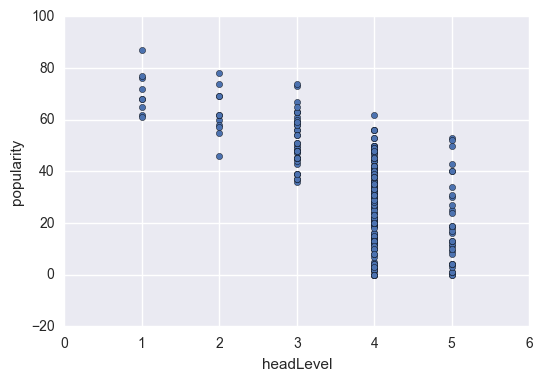

In [82]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

bands_df.plot.scatter('headLevel','popularity')

In [85]:
# persist the new bands object into file
with open('bands_new.json', 'w') as fp:
    json.dump(bands, fp)

In [110]:
np.mean(list(popularities.values()))

34.083700440528638